Using TensorFlow backend.
C:\Users\anoopa\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\models.py:281: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


pre-v 0
v -1.0
Predicted angle binned [  9.99999046e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.01014086e-06
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]
Predicted angleunbinned [-1.]
Predicted throttle [ 27.69939041]


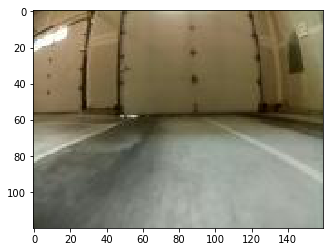

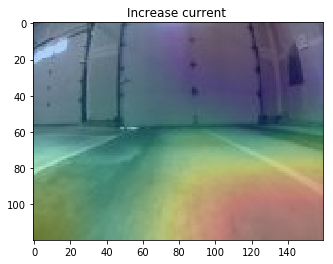

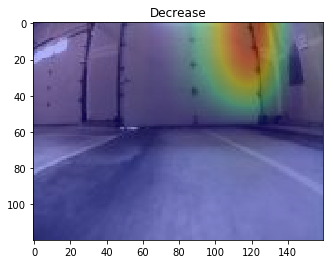

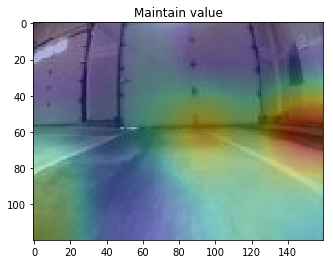

In [1]:
import numpy as np
import keras

from matplotlib import pyplot as plt
%matplotlib inline

from model import build_model, FRAME_W, FRAME_H
from keras.preprocessing.image import img_to_array
from vis.utils import utils

def linear_unbin(b):
    a = b *(2/14) - 1
    return a

def unbin_Y(Y):
    d=[]
#    for y in Y:
    v = np.argmax(Y)
    print('pre-v', format(v))
    v = linear_unbin(v)
    print('v',v)
    d.append(v)
    return np.array(d)

model = keras.models.load_model("model.hdf5")
#print(model.summary())
#img = utils.load_img('images/test.jpg', target_size=(FRAME_H, FRAME_W))
img = utils.load_img('images/input.jpg')
#plt.imshow(img)

# Convert to BGR, create input with batch_size: 1.
bgr_img = utils.bgr2rgb(img)
img_input = np.expand_dims(img_to_array(bgr_img), axis=0)
anglebinned = model.predict(img_input)[0][0]
throttle = model.predict(img_input)[1][0]
angleunbinned = unbin_Y(anglebinned)
print('Predicted angle binned {}'.format(anglebinned))
print('Predicted angleunbinned',format(angleunbinned))
print('Predicted throttle',throttle)

from vis.visualization import visualize_saliency, overlay, visualize_cam

titles = ['Increase current ', 'Decrease', 'Maintain value']
modifiers = [None, 'negate', 'small_values']

for i, modifier in enumerate(modifiers):
    heatmap = visualize_cam(model, layer_idx=-1, filter_indices=0, 
                            seed_input=img, grad_modifier=modifier)


    plt.figure()
  #Overlay is used to alpha blend heatmap onto img.
    plt.imshow(overlay(img, heatmap, alpha=0.7))
    plt.title(titles[i])